In [45]:
%matplotlib notebook
import webMining as wm
from IPython.core.display import display, HTML
from tabulate import tabulate
from matplotlib import pyplot as plt
import requests
import numpy as np
import mpld3
mpld3.enable_notebook()

Retrieve HTML document

In [46]:
#query = 'concertina+dupla+30cm+clipada'
query = 'notebook+ssd+16+gb+gpu'
url = 'https://www.google.com/search?nord=1&tbm=shop&sxsrf=ALeKk021SiG0jK8P5QFwMwEqTTzTaLSJzw%3A1592931029540&source=hp&ei=1TLyXsOJHpqj5OUPhpau4A0&q='+query+'&oq='+query+'&gs_lcp=Cgtwcm9kdWN0cy1jYxADMgQIIxAnMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAOgcIIxDqAhAnUNcxWKk3YLY9aAFwAHgAgAFyiAHhBpIBAzAuOJgBAKABAaoBD3Byb2R1Y3RzLWNjLXdperABCg&sclient=products-cc&ved=0ahUKEwiDyKjBspjqAhWaEbkGHQaLC9wQ4dUDCAc&uact=5' 
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://www.google.com/',
    'Connection': 'keep-alive',
    'Cookie': 'CGIC=Ikp0ZXh0L2h0bWwsYXBwbGljYXRpb24veGh0bWwreG1sLGFwcGxpY2F0aW9uL3htbDtxPTAuOSxpbWFnZS93ZWJwLCovKjtxPTAuOA; NID=204=g5k0DQlZKLTdLr2eD81V0cBic7FoycSof8bAgCMupaGwWO-cn-aDp4NUCNcHkvob_dhAbeN494eviqwrSCfwhQDQq_d-K4HTG-YNx2lF8KG8VIk6Yo2a7c3Pw5HotilTZgFSU8VD0uKVW8AV690h73WIiDIcfNVwDYelsvHet_n3khOjpi6XfQl0CObNAEM_f8Hm7OwWc6un1hNiaTSC2W__Y9roxCVOUOpPGvAiQgoBNL2k5G_H51ZyUiTKZRsH4QUu-MOLeMLsUtr5jwUVhZbGX4xfCzos-5uBgg; SID=xQcO_AUE9k37wpaevy5EK5x-zYouKXZoIrNPNOUA6FRikzN8XkHxgCwnV5Fzza3RX_3U_Q.; HSID=AmrflQdOkBZnypTpP; SSID=AnGRjrMyz8shzmiN-; APISID=gikUssmL2DgWeE-G/AGmE_sScY4sR1j7Gi; SAPISID=rEtgdwZ7oEheKA_J/AnzdQ-CXLl9P_DRxl; ANID=AHWqTUmOvuytiAZ-RiEMDbSXk1liOmiVXsC3K6j8wTAEsxXncb8Naetqd35RHH5u; SIDCC=AJi4QfH7YFZXPoNzhwKuKu3wXev3h6HvD9qbfqDB0-6PoOq2RkwFgUHu3oxgm8LCqqtm7aWDH_-J; SEARCH_SAMESITE=CgQI_48B; __Secure-3PSID=xQcO_AUE9k37wpaevy5EK5x-zYouKXZoIrNPNOUA6FRikzN8DoN4DUANadKjm3gWjbWkKQ.; __Secure-3PAPISID=rEtgdwZ7oEheKA_J/AnzdQ-CXLl9P_DRxl; __Secure-HSID=AmrflQdOkBZnypTpP; __Secure-SSID=AnGRjrMyz8shzmiN-; __Secure-APISID=gikUssmL2DgWeE-G/AGmE_sScY4sR1j7Gi; 1P_JAR=2020-06-23-16; OTZ=5502067_68_64_73560_68_416340; DV=k7tykpHOCQdJUOnslcXBzjs-r2ohLheAAP7r7W9LEAYAANDMM2lHtAn8AAIAAJSWJz2C-gppkwAAAA',
    'Upgrade-Insecure-Requests': '1',
    'TE': 'Trailers'}
#payload = ''
#response = requests.post(url, data=payload, headers=headers)
response = requests.get(url, headers=headers)

Instantiate DOM tree and extractor

In [33]:
#doc = wm.DOM('test.html')
f = open('test.html', 'w')
f.write(response.text)
f.close()
doc = wm.DOM(url, response.text)
#doc = wm.DOM('test.html')
dsre = wm.DSRE()

Extract

In [34]:
%%timeit
dsre.setUseFourier(True) # False = Lazy FFT (faster), True = Full FFT
dsre.extract(doc)

28.2 ms ± 311 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Iterate over the extracted regions:
    - content: True/False;
    - sequence: region's subsequence;
    - transform: region's Fourier Transform;
    - table: extracted records (rows x cols);
    - rows: number of records.

In [35]:
regions = []
for reg in range(0, dsre.regionCount()):
    region = dict()
    dr = dsre.getDataRegion(reg)
    region['content'] = dr.isContent()
    region['sequence'] = dr.getSequence()
    region['transform'] = dr.getTransform()
    region['table'] = dr.getTable()
    region['rows'] = len(region['table'])
    regions.append(region)

Displays a table with the results of each region

In [36]:
content_string = ['noise', 'content']
for i, region in enumerate(regions):
    display('Region #' + str(i) + ' - ' + content_string[region['content']] + ', ' + str(region['rows']) + ' records')
    display(tabulate(region['table'], tablefmt='html'))

'Region #0 - content, 20 records'

"Notebook 246-G7 9NH39LA, Processador i5 (8 Ger.) 1.6ghz, Memória 16GB, armazenamento 256GB SSD Para Velocidade Superior, Tela de 14"", Windows 10 Home","R$ 4.047,08.","R$ 4.047,08",Kalunga,Características do Produto Leve no orçamento. Pronto para os negócios. Conecte-se com o PC,HP 246-G7 econômico com a ...,·,·,·,·,·,HP,Windows,14 polegadas,HD de 256 GB,SSD,Disco rígido,"<img class=TL92Hc c12 data-deferred=1 id=srpresultimg_14411220331792614897_1_0 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",93%,positivos,Comparar preços de 2 lojas,(246),·,·,·,·,Notebook,,,1366 x 768,Intel,"Processador de 1,6 GHz",16 GB de RAM,,,,
"Notebook Lenovo Ultrafino ideapad S145 i7 - 8565U 8GB 1TB GeForce MX 110 Windows 10 15.6"" Full HD Dolby Audio Design Leve e Compacto, Prata","R$ 3.999,00.","R$ 3.999,00",Amazon.com.br - Retail,Design sofisticado com tela antirreflexo para mais conforto visual e melhor definição de imagem. O IdeaPad S145 é perfeito ...,·,·,·,·,·,·,Setembro de 2019,Lenovo,IdeaPad,Lenovo S Series,Windows,"15,6 polegadas","<img class=TL92Hc c12 data-deferred=1 id=srpresultimg_9715883945564289619_1_0 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",94%,positivos,Comparar preços de 10+ lojas,(232),·,·,·,,,,,8 GB de RAM,Disco rígido,SSD,HD de 1 TB,,4.345 comentários sobre o produto,,
"Notebook Gamer Legion Y540 i7-9750H 16GB 1TB 128GB SSD RTX2060 6GB W10 15.6"" FHD 81RJ0000BR Preto","R$ 8.999,00.","R$ 8.999,00",Submarino,Este elegante portátil eleva o desempenho dos jogos a outro patamar. As suas especificações poderosas asseguram uma grande ...,·,·,·,·,·,·,Outubro de 2019,Lenovo,Legion,Legion Y,Windows,"15,6 polegadas","<img class=TL92Hc c12 data-deferred=1 id=srpresultimg_18096342335970256361_1_0 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",,,Comparar preços de 10+ lojas,,·,·,·,,,,,Gamer,Disco rígido,SSD,HD de 1 TB,,2.221 comentários sobre o produto,,
Notebook Dell Latitude 5300 Core i5 8365u Memoria 16GB SSD 512GB Tela 13.3' HD Sistema Windows 10 Pro,"R$ 5.176,50.","R$ 5.176,50",Concórdia Informática,Especificação técnicas Nome da marca: Dell Série: 5300 Tamanho da tela: 13.3 polegadas Resolução máxima da tela: FHD Marca do ...,·,·,·,·,·,·,Dell,Dell Latitude,Dell Latitude 5000 Series,Windows,"13,3 polegadas",HD de 512 GB,,,,,,·,·,·,,,,,Intel,"Processador de 1,9 GHz",16 GB de RAM,SSD,,,"<img class=TL92Hc c16 data-deferred=1 id=srpresultimg_8053960701722680148_1_0 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",
"Notebook Gamer Acer Aspire Nitro AN515-54-76V7 9a Intel Core I7 16GB (GeForce GTX1650 com 4GB) 1TB+ 128GB SSD 15,6'' Endless Os + Mochila Targus","R$ 6.199,99.","R$ 6.199,99",Submarino,Gamer Acer Aspire Nitro AN515-54-76V7 9a Intel Core I7,(GeForce GTX1650 com 4GB) 1TB+ 128GB,"15,6'' Endless ...",·,·,·,·,"15,6 polegadas",HD de 128 GB,SSD,Gamer,16 GB de RAM,Intel,"<img class=TL92Hc c12 data-deferred=1 id=srpresultimg_10746054866460062763_1_0 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",,,,,·,·,·,,SSD,16GB,Notebook,Com placa de vídeo dedicada,NVIDIA GPU,,,,,,
"Notebook Lenovo Ultrafino ideapad S145 i5 - 8265U 12GB 1TB GeForce MX 110 Windows 10 15.6"" Dolby Audio Design Leve e Compacto, Prata","R$ 3.799,00.","R$ 3.799,00",Amazon.com.br - Retail,"Tela Antirreflexo de 15.6"" proporciona maior conforto visual e definição de imagem Expansão de armazenamento: slot disponível ...",·,·,·,·,·,·,Lenovo,IdeaPad,Lenovo S Series,Windows,"15,6 polegadas",HD de 1 TB,"<img class=TL92Hc c12 data-deferred=1 id=srpresultimg_8188614610780976177_1_0 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",94%,positivos,(232),,,·,·,·,,,,Outras opções:,NVIDIA GPU,Intel,12 GB de RAM,SSD,4.345 comentários sobre o produto,,256 GB - 8 GB
"Notebook Gamer Acer Aspire Nitro AN515-54-76V7 9a Intel Core I7 

'Region #1 - noise, 11 records'

"<img alt=Com placa de vídeo dedicada data-deferred=1 id=vrefimg_0_0_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Com placa de vídeo dedicada,
"<img alt=Gamer data-deferred=1 id=vrefimg_0_1_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Gamer,
"<img alt=Touchscreen data-deferred=1 id=vrefimg_0_2_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Touchscreen,
"<img alt=Conversível data-deferred=1 id=vrefimg_0_3_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Conversível,Filtrar por Marca
"<img alt=Dell data-deferred=1 id=vrefimg_1_0_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Dell,
"<img alt=Lenovo data-deferred=1 id=vrefimg_1_1_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Lenovo,
"<img alt=Acer data-deferred=1 id=vrefimg_1_2_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Acer,
"<img alt=Xiaomi data-deferred=1 id=vrefimg_1_3_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Xiaomi,
"<img alt=Avell data-deferred=1 id=vrefimg_1_4_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Avell,
"<img alt=VAIO data-deferred=1 id=vrefimg_1_5_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",VAIO,
"<img alt=HP data-deferred=1 id=vrefimg_1_6_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",HP,


'Region #2 - noise, 3 records'

Dell Inspiron 15 5000 - Ultrafino 2 em 1,Anúncio,·,deals.dell.com/,Anúncio,deals.dell.com/,·,"Inspiron com Frete Grátis e 10x Sem Juros é Somente na Dell. Confira Agora! Invista seu tempo no que realmente importa com Dell, Windows 10 e Microsoft 365. Confira as Ofertas. Tenha Garantia ProSupport. Mais Performance. Tipos:",Por que esse anúncio?,Por que esse anúncio?,Notebooks,Notebook,", All In One's.",Rating,"for dell.com: 4,9 - 323 reviews",· ‎,· ‎,· ‎,· ‎,· ‎,‎,Garantia Dell,Suporte Dell,Computadores Dell,Linha Inspiron,Dell 2 em 1,Dell XPS,,,,
Samsung S51 Intel Core i3 - Com Memória SSD 5x Mais Rápida,Anúncio,·,shop.samsung.com.br/notebooks/s51,Anúncio,shop.samsung.com.br/notebooks/s51,·,"Com Intel® UHD Grafics 620, 256",,,GB SSD,,"e 4GB RAM Para Você Aproveitar o melhor Desempenho. Inicie o Windows, carregue arquivos e aplicativos mais rápido. Descubra agora! Suporte Samsung. Leveza e Agilidade. Login com Digital. Ultrafino.",,,,,,,,,,,,,,,Sobre o anunciante,Por que esse anúncio?,Sobre o anunciante,Por que esse anúncio?
Notebook I7 16gb Ssd em Oferta ‹ Magazine Luiza,Anúncio,·,busca.magazineluiza.com.br/,Anúncio,busca.magazineluiza.com.br/,·,"Ofertas Com o Menor Preço e Até 12x Sem Juros Você Encontra no Magalu. Tem De Tudo Aqui. Compre Agora e Receba Em Casa ou Retire na Loja*. Vem Aproveitar. Baixe o Super APP. Dinheiro De Volta Magalu. Crie Conta No Magalu Pay. Marcas: Black&Decker, Mondial.",Por que esse anúncio?,Por que esse anúncio?,,,,Rating,"for magazineluiza.com.br: 4,8 - 617 reviews",· ‎,· ‎,· ‎,‎,,,Tem no Magalu,Celular e Smartphone,Utilize o Cupom MERCADO30,Ofertas do Dia,,,,,,


Plot the sequence of the document and the subsequence+transform of each region

<IPython.core.display.Javascript object>


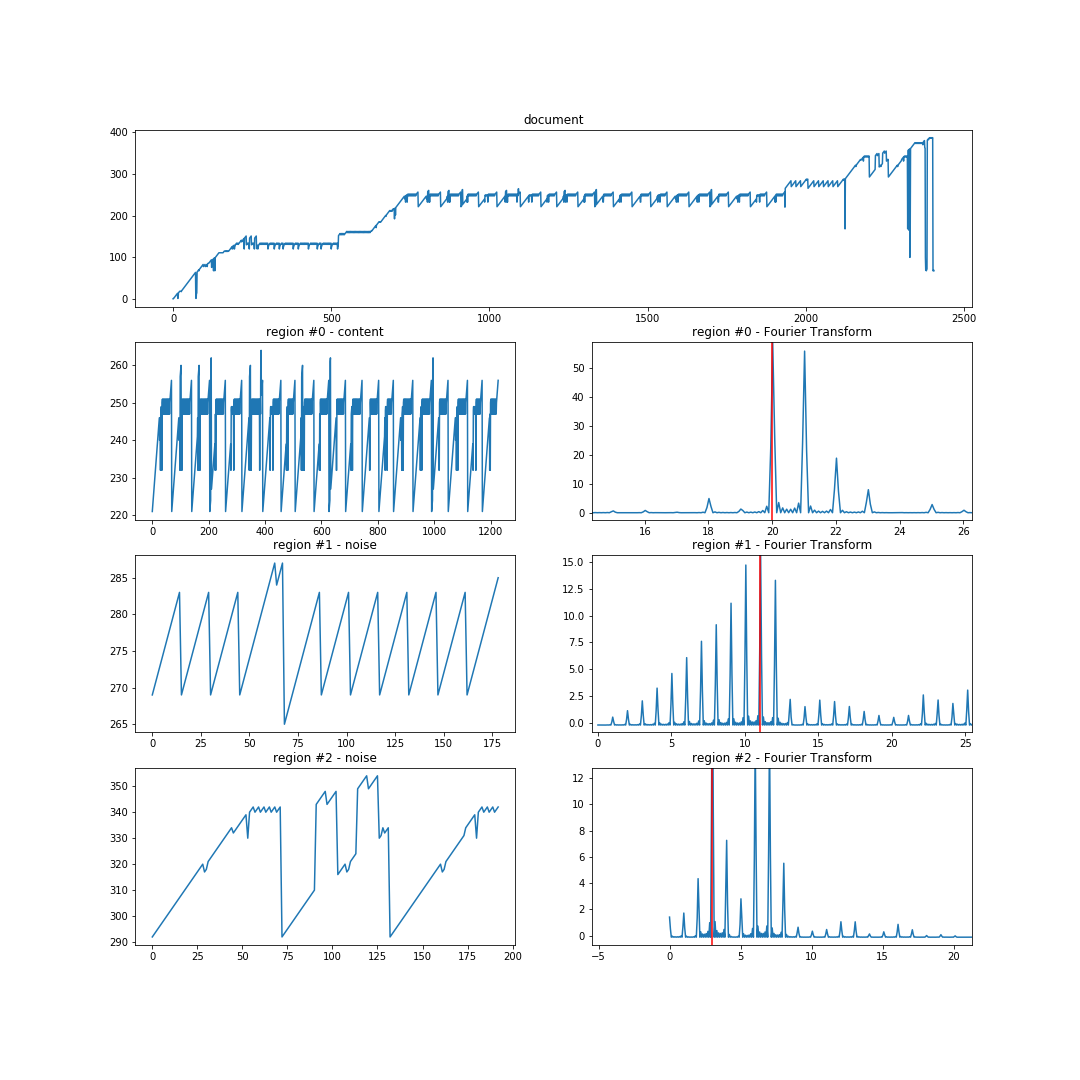

In [49]:
%matplotlib notebook
rows = len(regions) + 1
plt.figure(figsize=(15,15))
plt.subplot(rows, 1, 1)
plt.title('document')
plt.plot(dsre.getSequence())
for i, region in enumerate(regions):
    plt.subplot(rows, 2, (i+1)*2 + 1)
    plt.title('region #' + str(i) + ' - ' + content_string[region['content']])
    plt.plot(region['sequence'])
    plt.subplot(rows, 2, (i+1)*2 + 2)
    plt.title('region #' + str(i) + ' - Fourier Transform')
    sequence_len = len(region['sequence'])
    transform_len = len(region['transform'])
    plt.plot(
        np.linspace(0, sequence_len, transform_len), 
        region['transform'][0:transform_len])
    plt.axvline(region['rows'], min(region['transform']), max(region['transform']), c='r')
    plt.plot()

In [25]:
transform_ratio

15.972881355932204